# <font color='maroon'>GEOS 612 Module 2 Discussion: Metadata Roles</font>
### By: Michael Cox
### Current as of: November 10, 2022
---

In [29]:
# necessary imports:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt  # matplotlib
import matplotlib.dates
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy  # cartopy for maps
import cartopy.crs as ccrs  
import cartopy.feature as cfeature

# check versions
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('xarray version: ', xr.__version__)
print('cartopy version: ', cartopy.__version__)

numpy version:  1.23.3
pandas version:  1.4.4
xarray version:  0.20.1
cartopy version:  0.18.0


### Discussion prompt. How do you depend on the quality of the data in what you do? What is the role of metadata in data quality?

## 1. Load Data.

- First, I will select a netCDF data file on sea surface temperature as a demonstration and conduct some analysis on its metadata

#### Data Source:
The National Oceanic and Atmospheric Administration (NOAA) Physical Sciences Laboratory (PSL) Extended Reconstructed Sea Surface Temperature (SST)
   - NOAA Extended Reconstructed SST, V5; noaa_sst_v5.nc
   - This dataset is a global monthly SST analysis from 1854 to the present derived from ICOADS data with missing data filled in by statistical methods.
   - Source: https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html

In [10]:
# define, load, and print 
noaa_sst_data = nc.Dataset('noaa_sst_v5.nc')  # using netCDF4.Dataset to load my .nc file 
print(noaa_sst_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)
    climatology: Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.
    description: In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.
    citation: Huang et al, 2014: Extended Reconstructed Sea Surface Temperatures Version 4 (ERSST.v4), Part I. Upgrades and Intercomparisons. Journal of Climate.
    comment: SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker
    Conventions: CF-1.2
    institution: This version written at NOAA/ESRL PSD: obtained from NOAA/NESDIS/National Climatic Data Center
    key

## 2. Analyze Metadata 

As shown above, the metadata provides initial analysis such as the spatial box that you are working with (geospatial mins and max of latitude and longitude) as well as the units (degrees_north and degrees_east), and many others. I will utilize some techniques from Module 2's lab for this example. 

In [13]:
# define filename and file_content using xarray
filename = 'noaa_sst_v5.nc'
file_content = xr.open_dataset(filename, mask_and_scale=False)

In [17]:
# print the data files 
print('- The number of variables in the file:    ', len(file_content), '\n\n')

# using the ~type~ function to print the file variables 
print('- The file variables are loaded in:    ', type(file_content), '\n\n')

# print file content
print('- File Content:    ', '\n\n', file_content, '\n\n')

- The number of variables in the file:     2 


- The file variables are loaded in:     <class 'xarray.core.dataset.Dataset'> 


- File Content:     

 <xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 1994, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/30)
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by

`time_bnds` is a separate 2-dimensional variable that defines the start and end time points of each measurement (https://daac.ornl.gov/submit/netcdfrequirements/#:~:text=bounds%20%3D%20%22time_bnds%22.,%22%20as%20variable%20%22time%22) 

As shown we have 2 variables in our netCDF file, all loaded in an xarray.core.dataset.Dataset class, with its file contents listed and shown above. Below is another method I use to obtain a metadata snapshot. 

In [26]:
# metadata 
file_content

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 1994, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 1.972e+04 1.975e+04 ... 8.038e+04 8.041e+04
    sst        (time, lat, lon) float32 ...
Attributes: (12/30)
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by conventional thermometers ...
    Conventions:             CF-1.2
    ...                      ...
    original_publisher_url:  http://www.ncdc.noaa.gov
    dataset_title:           Extended Reconstructed Sea Surface Temperature (...
    Source:                  http://www.ncdc.noaa.gov/data-access/marineocean...
    data_modified:           2020-03-03
    References:              http://www.psl.noaa.gov/data/gridded/data.noaa.e...
    history:                 08-Sep-2022 15:45:52 Subset NOAA/PSL

Our overall file has Dimensions of 89 lat, 180 lon, each float32s, and time as datetime64[ns], which makes time-series analysis much easier. The file has 3 coordinates (lat, lon, time). Our two Data Variables are time_bnds and sst. Notice we have 30 Attributes such as climatology, description, Source, etc.) This data file has a robust metadata schema, and it shows the value that NOAA places into such data. Next I will plot a map of our data from an overview standpoint. 

## 3. Plot data 

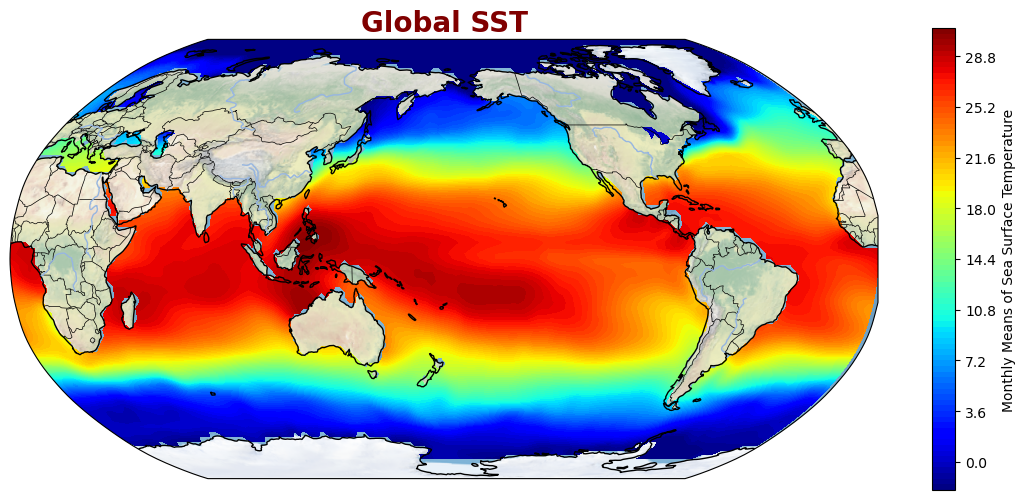

In [41]:
# Sea Surface Temperature analysis with volcanic eruptions 

# set the data that I will use for my map 
sst = noaa_sst_data['sst'][0]   # same as nc['sst'][0, :, :], gets the first 2D time slice in the series.
sst_lon = noaa_sst_data['lon'][:]
sst_lat = noaa_sst_data['lat'][:]

# set the projection for map 
proj = cartopy.crs.Robinson(central_longitude=180) # Mollweide for global map, lambertconformal for nice fortune cookie map 
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(14,6))

# choose color map style and projection
ax = fig.add_subplot(111, projection=proj)
mappable = ax.contourf(sst_lon, sst_lat, sst, 100, cmap=plt.get_cmap('jet'), transform=pc) # try different colormaps ; #add land, Colorbar with proper label and units, Title with nicely formatting date and time

# set geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')                                       # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()
ax.set_title('Global SST', size=20, color='maroon', weight='bold')

# add colorbars 
fig.colorbar(mappable).set_label('%s' %noaa_sst_data['sst'].long_name)

A quick example of using metadata is checking the units, because my map above has temperatures but no units attached. Looking at the sst attribute will show that the units are indeed in degrees celsius, and the data consist of monthly means. 

In [34]:
file_content.sst

<xarray.DataArray 'sst' (time: 1994, lat: 89, lon: 180)>
[31943880 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-02-01
Attributes:
    long_name:      Monthly Means of Sea Surface Temperature
    units:          degC
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Mean
    missing_value:  -9.96921e+36
    actual_range:   [-1.8  33.95]
    valid_range:    [-5. 40.]
    dataset:        NOAA Extended Reconstructed SST V4
    parent_stat:    Individual Values

Having a solid foundation when it comes to metadata will pay dividends in the end of any project or data-driven decision because it sets the standard for the entirety of your data. The metadata associated with this netCDF file contains a great amount of detail and thus makes it a great option for further data analysis. If a file has more non-existing metadata than it has existing, then the overall trust and reliability of the data is gone. There will be no continuity and reproducibility, which leads to data redundancy and decisions based off of incomplete data. The better the metadata, the better the quality. 

### Thanks for tuning in! 